In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [12]:
boros = gpd.read_file('https://github.com/jreades/i2p/blob/master/data/src/Boroughs.gpkg?raw=true')
df = pd.read_csv('https://github.com/jreades/i2p/raw/master/data/2020-08-24-sample-listings-simple.csv')

In [16]:
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitude, df.latitude, crs='epsg:4326')).to_crs('epsg:27700')

<AxesSubplot:>

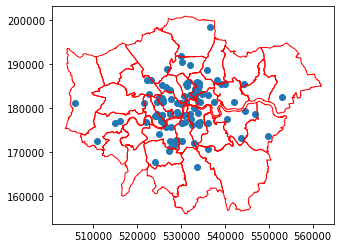

In [18]:
ax = gdf.plot()
boros.plot(ax=ax, facecolor='none', edgecolor='r')

<AxesSubplot:>

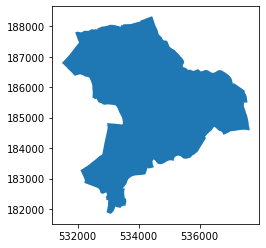

In [22]:
hackney = boros[boros.NAME=='Hackney']
hackney.plot()

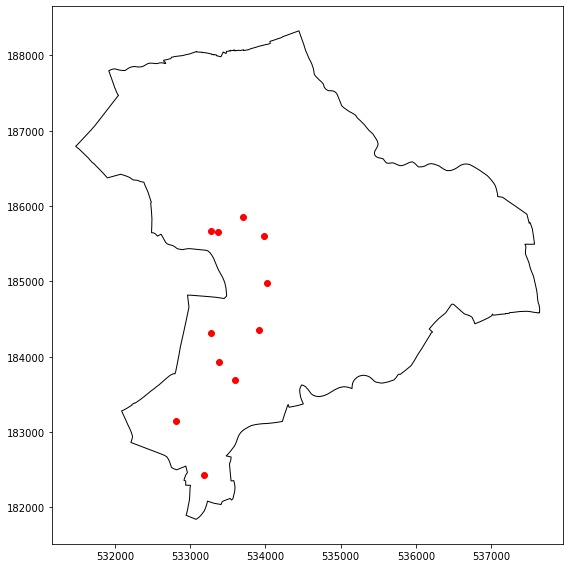

In [27]:
rs = gpd.sjoin(gdf, hackney, op='within')
ax = boros[boros.NAME=='Hackney'].plot(edgecolor='k', facecolor='none', figsize=(8,8))
rs.plot(ax=ax, color='r')
plt.tight_layout()
plt.savefig('img/Hackney.png', dpi=150)

In [40]:
%matplotlib widget

In [44]:
rs = gpd.sjoin(gdf, hackney, how='left', op='within')
rs.NAME.fillna('None', inplace=True)
ax = boros[boros.NAME=='Hackney'].plot(edgecolor='k', facecolor='none')
rs.plot(ax=ax, column='NAME', legend=True)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

<AxesSubplot:>

In [35]:
rs.NAME.fillna('None', inplace=True)

<AxesSubplot:>

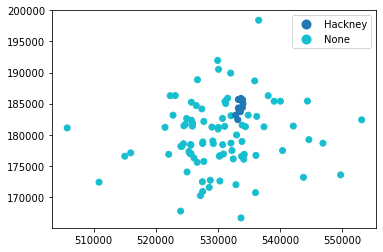

In [37]:
rs.plot(column='NAME', legend=True)

In [29]:
# Not supported
gpd.sjoin(boros, hackney, op='touches')

ValueError: `op` was "touches" but is expected to be in ['contains', 'within', 'intersects']

In [47]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = plt.axes(projection="3d")

z_line = np.linspace(0, 15, 1000)
x_line = np.cos(z_line)
y_line = np.sin(z_line)
ax.plot3D(x_line, y_line, z_line, 'gray')

z_points = 15 * np.random.random(100)
x_points = np.cos(z_points) + 0.1 * np.random.randn(100)
y_points = np.sin(z_points) + 0.1 * np.random.randn(100)
ax.scatter3D(x_points, y_points, z_points, c=z_points, cmap='hsv');

plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [49]:
from bokeh.plotting import figure, output_notebook, show

# prepare some data
x = [0.1, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0]
y0 = [i**2 for i in x]
y1 = [10**i for i in x]
y2 = [10**(i**2) for i in x]

# output to static HTML file
output_notebook()

# create a new plot
p = figure(
   tools="pan,box_zoom,reset,save",
   y_axis_type="log", y_range=[0.001, 10**11], title="log axis example",
   x_axis_label='sections', y_axis_label='particles'
)

# add some renderers
p.line(x, x, legend_label="y=x")
p.circle(x, x, legend_label="y=x", fill_color="white", size=8)
p.line(x, y0, legend_label="y=x^2", line_width=3)
p.line(x, y1, legend_label="y=10^x", line_color="red")
p.circle(x, y1, legend_label="y=10^x", fill_color="red", line_color="red", size=6)
p.line(x, y2, legend_label="y=10^x^2", line_color="orange", line_dash="4 4")

# show the results
show(p)

Loading BokehJS ...